In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [14]:
# Load TF-IDF matrix and labels from pickle files
with open("../data/tfidf_matrix.pkl", "rb") as f:
    tfidf_matrix = pickle.load(f)

with open("../data/labels.pkl", "rb") as f:
    labels = pickle.load(f)

In [15]:
# Split the TF-IDF matrix and labels into training, validation, and test sets
train_data, test_val_data, train_labels, test_val_labels = train_test_split(tfidf_matrix, labels, train_size=0.7, random_state=42, shuffle=True, stratify=labels)

test_data, val_data, test_labels, val_labels = train_test_split(test_val_data, test_val_labels, train_size=0.5, random_state=42, shuffle=True, stratify=test_val_labels)

In [16]:
# Define a function to plot the confusion matrix
def plot_confusion_matrix(matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion matrix')

## Logistic Regression

In [17]:
# Initialize and train the Logistic Regression classifier
logreg = LogisticRegression(max_iter=1000)
logreg.fit(train_data, train_labels)

# Make predictions on the test data
predictions = logreg.predict(test_data)

In [18]:
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      7944
           1       0.87      0.89      0.88      5771
           2       0.81      0.78      0.80      4965

    accuracy                           0.86     18680
   macro avg       0.86      0.86      0.86     18680
weighted avg       0.86      0.86      0.86     18680



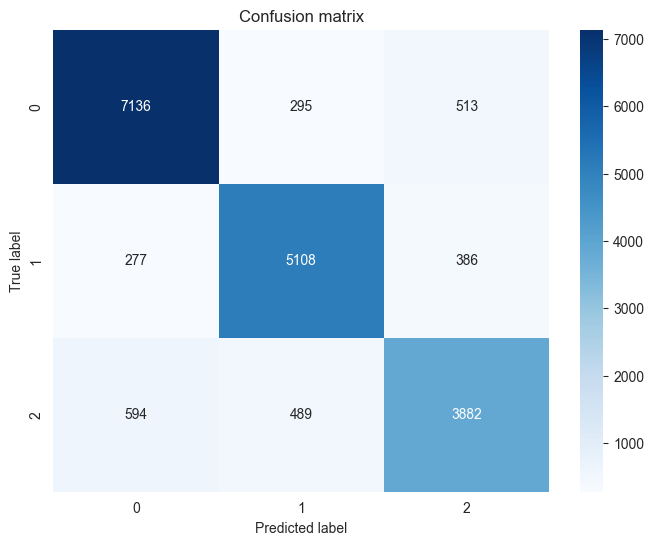

In [19]:
plot_confusion_matrix(confusion_matrix(test_labels, predictions))

## Naive Bayes

In [20]:
# Initialize and train the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(train_data, train_labels)

# Make predictions on the test data
nb_predictions = nb_classifier.predict(test_data)

In [21]:
print(classification_report(test_labels, nb_predictions))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      7944
           1       0.85      0.90      0.87      5771
           2       0.80      0.76      0.78      4965

    accuracy                           0.85     18680
   macro avg       0.85      0.85      0.85     18680
weighted avg       0.85      0.85      0.85     18680



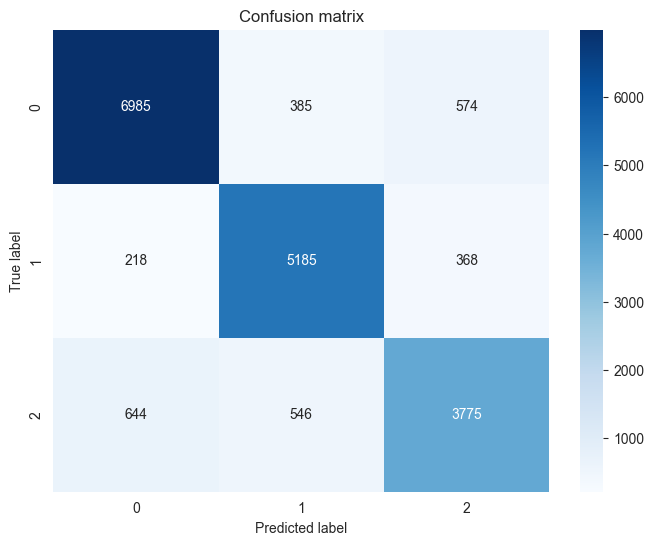

In [22]:
plot_confusion_matrix(confusion_matrix(test_labels, nb_predictions))